In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.optimize as opt
from itertools import product
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.optimize import brute
from scipy.optimize import minimize_scalar


In [2]:
pip install autograd


Note: you may need to restart the kernel to use updated packages.


In [3]:
def RF(x):
    N = len(x)
    result = 0
    for i in range(N-1):
        result += (1 - x[i])**2 + (x[i+1] - x[i]**2)**2
    return result

let λ be the Lagrange multiplier on the constraint, 
Suppose that the function f(x, y) has to be maximized by choice of x and y subject to the constraint that g(x, y) ≤ k. The solution can be found by constructing the Lagrangean function
L(x, y, λ) = f(x, y) + λ[k − g(x, y)]

In this case, we can write as below;
L(x, λ) = Σ[a * (1 - x_i)^2 + b * (x_{i+1} - x_i^2)^2] + λ(Σx_i^2 - r)


#a)i


x is the n-dimensional vector of decision variables,
λ is the Lagrange multiplier on the constraint,
Rosenbrock function defined as rf(x) = Σ[a * (1 - x_i)^2 + b * (x_{i+1} - x_i^2)^2] from i = 1 to n-1,
constraint function defined as c(x) = Σ(x_i)^2 from i = 1 to n
r is the given radius of the unit sphere.
So, the Lagrangian L is:
L(x, λ) = Σ[a * (1 - x_i)^2 + b * (x_{i+1} - x_i^2)^2] from i = 1 to n-1 + λ(Σ(x_i)^2 from i = 1 to n - r)


Lagrangian function is used to find the optimal values of the decision variables subject to some constraints,given a specific point x (the decision variables) and a value of the multiplier λ, we can calculate the value of the Lagrangian function for that point and multiplier.

In [4]:
#a)ii

def RF_lagrangian(x, a, b, r, λ):
    n = len(x)
    rf = np.sum([a * (1 - x[i])**2 + b * (x[i+1] - x[i]**2)**2 for i in range(n-1)])
    cf = np.sum([x[i]**2 for i in range(n)])
    return rf + λ * (cf - r)

# of is object function, cf is contraint function

#a)iii
Cite:
https://kitchingroup.cheme.cmu.edu/blog/2018/11/03/Constrained-optimization-with-Lagrange-multipliers-and-autograd/

In [5]:
#a iii
import autograd.numpy as np
from autograd import grad
# Define function to calculate gradient of Lagrangian

def grad_lagrangian(x, lmbda, a, b, r):
    # calculate gradient of Rosenbrock function 
    grad_f = grad(lambda x: lagrangian(x, lmbda, a, b, r))(x)
    
    # calculate gradient of constraint that x lies on the unit sphere of radius r
    grad_g = 2 * np.array(x)
    
    # combine gradients and return
    return grad_f + lmbda * grad_g



the grad function from Autograd is used to automatically calculate the gradient of the lagrangian function with respect to its first argument (i.e. x). The other arguments (λ, a, b, and r) are treated as constants

In [14]:

#iv
def rosenbrock(x, a, b):
    n = len(x)
    return sum(a * (1 - x[i])**2 + b * (x[i+1] - x[i]**2)**2 for i in range(n-1))
def constraint(x, r):
    return sum(xi**2 for xi in x) - r**2
def lagrangian(x, lmbda, a, b, r):
    return rosenbrock(x, a, b) + lmbda * constraint(x, r)




In [20]:
# In order to test gradient on 100 uniformly sampled points
# We need to set the random seed to a specific value
np.random.seed(123)
n = 5
points = np.random.uniform(size=(100, n))

# Set a=1 and test for different values of b
a = 1
for b in [1, 100, 1000]:
    
    # Generate 100 uniformly sampled points
    points = np.random.uniform(size=(100, n))
    for point in points:
        # Generate a random value for lambda
        lmbda = np.random.uniform()
        # Calculate the analytic gradient
        grad_analytic = grad_lagrangian(point, lmbda, a, b, r=1)
        # Calculate the finite difference gradient
        eps = 1e-6
        grad_fd = np.zeros(n)
        for i in range(n):
            delta = np.zeros(n)
            delta[i] = eps
            grad_fd[i] = (lagrangian(point + delta, lmbda, a, b, r=1) - lagrangian(point - delta, lmbda, a, b, r=1)) / (2 * eps)
        #Small rmse indicates that the analytic gradient is a good approximation of the true gradient
        # calculate the root mean squared error between the two gradients
        rmse = np.sqrt(((grad_analytic - grad_fd)**2).mean())
        print(f"Point: {point}, Lambda: {lmbda}, RMSE: {rmse}")
        




Point: [0.2128315  0.39230407 0.85154805 0.12761222 0.89386537], Lambda: 0.08189443905104887, RMSE: 0.09661083843245133
Point: [0.49650797 0.42609566 0.30564639 0.91684879 0.51762346], Lambda: 0.49503963158973086, RMSE: 0.5653071914924023
Point: [0.80402637 0.85765179 0.92238235 0.30338073 0.33981085], Lambda: 0.288890068654162, RMSE: 0.4036467714571481
Point: [0.59507388 0.44132414 0.93284253 0.39756405 0.47777805], Lambda: 0.6399918687621287, RMSE: 0.7691422470501607
Point: [0.61718609 0.40473949 0.99247844 0.09885128 0.22060332], Lambda: 0.49993594743139114, RMSE: 0.5635204845304812
Point: [0.32265513 0.14772284 0.28421923 0.77924529 0.522892  ], Lambda: 0.036044852595867316, RMSE: 0.03361805389583183
Point: [0.03395364 0.98262259 0.61600648 0.05893948 0.66116877], Lambda: 0.31863390057039687, RMSE: 0.38095419097225736
Point: [0.37836937 0.1356733  0.56366459 0.72707995 0.6711266 ], Lambda: 0.48905919073955906, RMSE: 0.5282463355223461
Point: [0.24751315 0.52486622 0.53766344 0.7168

The Rosenbrock function has many local minima, and its difficulty increases with b. When b is small, the function is relatively flat, and the global minimum is easy to find. As b increases, the function becomes steeper, with a narrower and curved valley leading to the global minimum. When b is very large, the function becomes even more challenging, with sharp local minima. Finite differences may become less accurate at this point, depending on the step size and optimization algorithm used. It is generally better to use autodifferentiation to ensure accurate and efficient gradient computation.

When b=1000, RF get steeper

In [6]:
import numpy as np

def hessian(f, x):
    """
    Calculate the Hessian matrix of a scalar-valued function f at point x.
    
    Parameters:
    f (function): A scalar-valued function of n variables.
    x (ndarray): A 1D array representing the point at which to calculate the Hessian.
    
    Returns:
    ndarray: The Hessian matrix of f at point x.
    """
    n = x.size
    hess = np.zeros((n, n))
    eps = np.sqrt(np.finfo(float).eps)  # Machine epsilon
    
    for i in range(n):
        for j in range(i, n):
            # Calculate the second partial derivatives using central finite differences
            # with a step size of sqrt(eps) for improved accuracy
            delta1 = np.zeros(n)
            delta1[i] = eps**0.5
            delta2 = np.zeros(n)
            delta2[j] = eps**0.5
            hess[i, j] = (f(x + delta1 + delta2) - f(x + delta1 - delta2) - f(x - delta1 + delta2) + f(x - delta1 - delta2)) / (4 * eps)
            hess[j, i] = hess[i, j]
    
    return hess



    """ 
        we use central finite differences to estimate the second partial derivatives of the function at the given point. 
        The step size used is sqrt(eps),
        where eps is the machine epsilon (the smallest representable floating point number). 
        This choice of step size can improve the accuracy of the finite difference approximation.
        The Hessian matrix is then assembled from the second partial derivatives.
        
    """

Question 2. Maximum Likelihood

(a)

To show that finding θ⋆ through solving the maximization problem of L(D,θ) is equivalent to solving the maximization problem of l(D,θ), we can proceed as follows.

Assume first that θ⋆ solves max L(D,θ), which means that θ⋆ maximizes the likelihood function L(D,θ) = Π Pr(yi=1|Xi,θ) for the dataset D. By taking the logarithm of both sides, we obtain:
log L(D,θ) = Σ[yi * log(Pr(yi=1|Xi,θ)) + (1-yi) * log(1-Pr(yi=1|Xi,θ))]. 
Since the second term in this expression does not depend on θ, maximizing log L(D,θ) is equivalent to maximizing the first term, which is l(D,θ) = Σ[yi * log(Pr(yi=1|Xi,θ))].

Now, assume the contrary, that θ⋆ solves max l(D,θ) but not max L(D,θ). This means that there exists another value of θ, say θ', such that L(D,θ') > L(D,θ⋆). It follows that log L(D,θ') > log L(D,θ⋆), 
and hence Σ[yi * log(Pr(yi=1|Xi,θ'))] > Σ[yi * log(Pr(yi=1|Xi,θ⋆))]. 
However, this contradicts the fact that θ⋆ solves max l(D,θ), which implies that l(D,θ') ≤ l(D,θ⋆) for any θ'. Therefore, our assumption is false, and we conclude that θ⋆ solves max L(D,θ) if and only if it solves max l(D,θ).

(b)
Firstly, the log function is monotonic, so maximizing the log-likelihood is equivalent to maximizing the likelihood. However, the log transformation makes the optimization problem numerically more stable, as it avoids underflow or overflow errors that can occur when multiplying many small probabilities or dividing by many large probabilities.

Secondly, the log-likelihood function is easier to work with mathematically, as it involves sums instead of products. This simplifies the expression and allows us to take derivatives more easily, leading to simpler and more efficient algorithms for optimization.

(c)

Given a binary outcome variable y that can take the values 0 or 1, the probability of y being equal to 0 when conditioned on a set of explanatory variables X and a vector of parameters θ can be obtained by subtracting the probability of y being equal to 1 from 1.

Using the logistic function to model the probability of y being equal to 1, we can write the expression for Pr(y=0|X,θ) as:

Pr(y=0|X,θ) = 1 - Pr(y=1|X,θ)

Substituting the logistic function for Pr(y=1|X,θ), we have:

Pr(y=0|X,θ) = 1 - 1 / (1 + exp(Xθ))

Simplifying this expression yields:

Pr(y=0|X,θ) = exp(Xθ) / (1 + exp(Xθ))

(d)

To show that we can write log Pr(y, X, θ) as y log(p(X, θ)) + (1 − y) log(1 − p(X, θ)), we first need to write the likelihood L(y, X, θ) as p(X, θ)^y * (1 - p(X, θ))^(1-y).

Since y is binary and takes values of either 0 or 1, we can enumerate all the possibilities:

If y = 1, then L(y, X, θ) = p(X, θ)
If y = 0, then L(y, X, θ) = 1 - p(X, θ)
Therefore, we can write the likelihood as L(y, X, θ) = p(X, θ)^y * (1 - p(X, θ))^(1-y).

Now, taking the logarithm of both sides, we get:

log L(y, X, θ) = y log(p(X, θ)) + (1 - y) log(1 - p(X, θ))

Since log L(y, X, θ) = log Pr(y, X, θ), we have shown that log Pr(y, X, θ) can be written as y log(p(X, θ)) + (1 − y) log(1 − p(X, θ)).

In [2]:
#2e

def log_likelihood(theta, y, X):
    # Calculate the probability of y=1 given X and theta
    p = 1 / (1 + np.exp(-np.dot(X, theta)))
    # Calculate the log-likelihood using the formula
    log_l = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    return log_l

def gradient(theta, y, X):
    # Calculate the probability of y=1 given X and theta
    p = 1 / (1 + np.exp(-np.dot(X, theta)))
    # Calculate the gradient of the log-likelihood with respect to theta
    grad = np.dot(X.T, (p - y))
    return grad

def hessian(theta, y, X):
    # Calculate the probability of y=1 given X and theta
    p = 1 / (1 + np.exp(-np.dot(X, theta)))
    # Calculate the diagonal matrix of weights
    W = np.diag(p * (1 - p))
    # Calculate the Hessian matrix of the log-likelihood with respect to theta
    hess = np.dot(X.T, np.dot(W, X))
    return hess



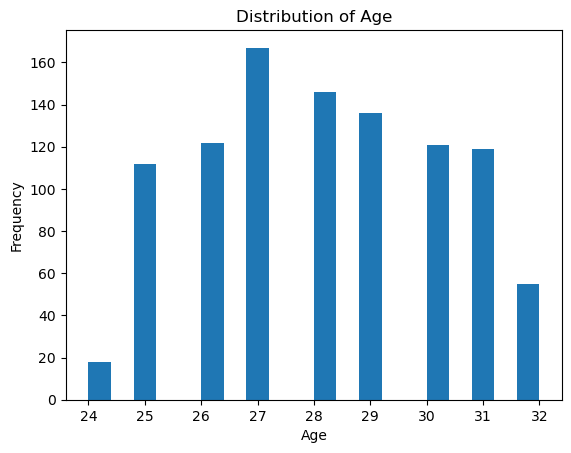

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#Distribution of age

# Load the data from the CSV file
data = pd.read_csv('//Users/curtischan/Downloads/data.csv')

# Extract the age column
age = data['age']

# Plot the histogram
plt.hist(age, bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()




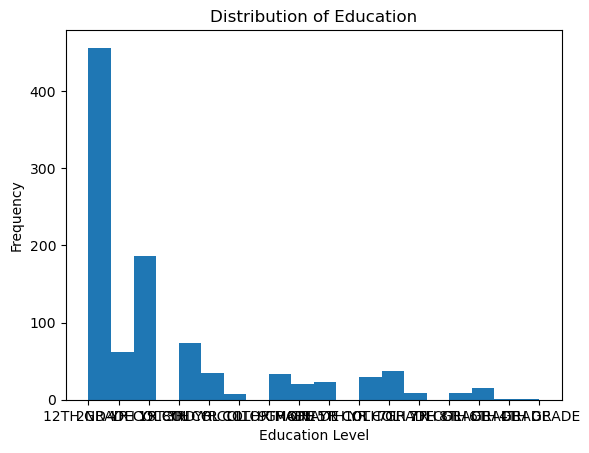

In [18]:
# Distribution of Education:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_stata('/Users/curtischan/Downloads/data.dta')

# Plot the distribution of education
plt.hist(df.eduyrs, bins=20)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Distribution of Education')
plt.show()


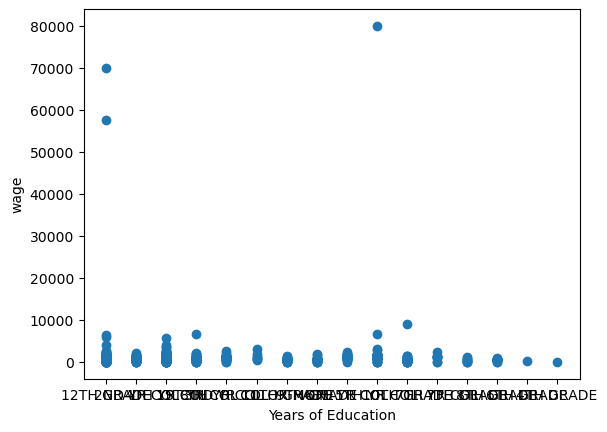

In [19]:
import matplotlib.pyplot as plt

# Extract education and income data from the DataFrame
education = df['eduyrs']
income = df['wage']

# Create a scatter plot
plt.scatter(education, income)

# Set the axis labels
plt.xlabel('Years of Education')
plt.ylabel('wage')

# Show the plot
plt.show()


In [43]:
# Load data
data = pd.read_csv('/Users/curtischan/Downloads/data.csv')

# Create dummy variables for categorical variables
race_dummies = pd.get_dummies(data['race'], prefix='race', drop_first=True)
marital_dummies = pd.get_dummies(data['marital'], prefix='marital', drop_first=True)
region_dummies = pd.get_dummies(data['region'], prefix='region', drop_first=True)
urban_dummies = pd.get_dummies(data['urban'], prefix='urban', drop_first=True)

# Convert 'sex' column to numerical data type using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

# Convert 'eduyrs' column to numerical data type using mapping
edu_map = {'8TH GRADE': 8, '9TH GRADE': 9, '10TH GRADE': 10, '11TH GRADE': 11, '12TH GRADE': 12,
           '1 YR COLL': 13, '2 YR COLL': 14, '4 YR COLL': 16, '5+ YR COLL': 18, 'NONE': 0}
data['eduyrs'] = data['eduyrs'].map(edu_map)


# Concatenate the dummy variables with the continuous variables
X = pd.concat([data['age'], data['sex'], race_dummies, marital_dummies, data['famsize'], education_dummies, data['IQ'], data['childsupp'], data['welfare'], region_dummies, urban_dummies, data['unemprate']], axis=1)
y = data['empstat']

# Convert X to float data type
X = X.astype(float)

# Define log-likelihood function
def log_likelihood(theta, y, X):
    p = 1 / (1 + np.exp(-np.dot(X, theta)))
    log_l = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    return log_l

# Define gradient function
def gradient(theta, y, X):
    p = 1 / (1 + np.exp(-np.dot(X, theta)))
    grad = np.dot(X.T, (p - y))
    return grad

# Define Hessian function
def hessian(theta, y, X):
    p = 1 / (1 + np.exp(-np.dot(X, theta)))
    W = np.diag(p * (1 - p))
    hess = np.dot(X.T, np.dot(W, X))
    return hess

# Test the functions with initial guess theta = 0
theta = np.zeros(X.shape[1])
log_l = log_likelihood(theta, y, X)
grad = gradient(theta, y, X)
hess = hessian(theta, y, X)

print("Log-likelihood: ", log_l)
print("Gradient: ", grad)
print("Hessian: ", hess)


ValueError: could not convert string to float: 'NO'